In [134]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [13]:
hotels = pd.read_excel("HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [15]:
hotels.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'date'],
      dtype='object')

In [4]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


# Exercice 1: Plotting DataFrames
* Afficher les colonnes `LodgingRevenue` et `OtherRevenue` du dataframe monthly_revenue ci-dessous en utilisant un line chart 

In [21]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("ME").sum()


,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35
2016-06-30,588701.29,151214.74
2016-07-31,749828.61,210745.90
2016-08-31,842445.29,238536.04
2016-09-30,774270.05,181678.34


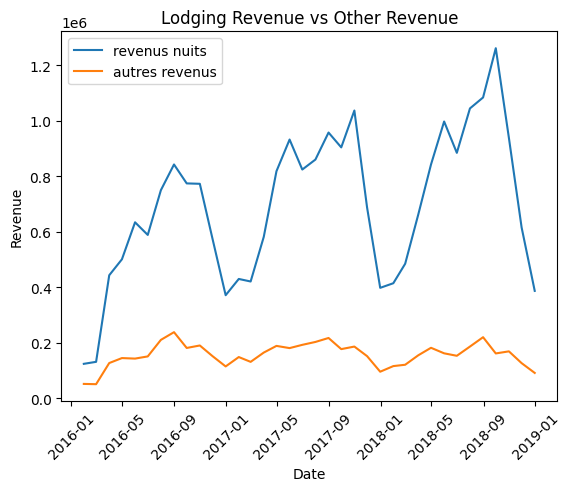

In [35]:
plt.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'], label="revenus nuits")
plt.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'], label= 'autres revenus')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Lodging Revenue vs Other Revenue')
plt.xticks(rotation=45)  # Faites pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
plt.legend()  # Afficher la légende
# Afficher le graphique
plt.show()

# Exercice 2: Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Affichez la somme des revenus mensuels pour les colonnes `LodgingRevenue` et `OtherRevenue`.

Formattez le graphique, en ajoutant des titres, une légende, en supprimant les bordures droite et haute et en faisant une rotation des index sur l'axe des abscisses.

Vous pouvez également modifier les titres ainsi que leurs propriétés

In [45]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("ME").sum()


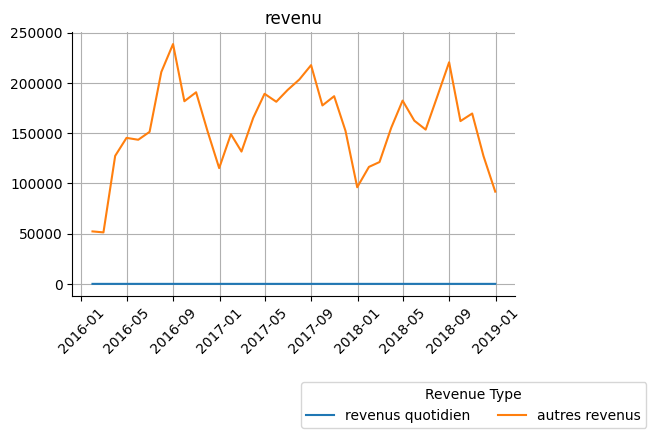

In [60]:
plt.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue']/(12**6), label='revenus quotidien')
plt.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'], label= 'autres revenus')
plt.title('revenu')
plt.xticks(rotation=45)  # Faites pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
plt.legend(title='Revenue Type',  loc='upper left', bbox_to_anchor=(0.5, -0.3), ncol=2) 
plt.grid(True)  # Afficher une grille pour une meilleure lisibilité
plt.tight_layout()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

# Exercice 3: Dual Axis Line Chart

Affichez la somme des nuits reservées ainsi que la somme des annulations de reservations trimestrielles (utilisez resample('QE'))

Affichez les courbes sur le même graphique mais avec des axes Y différents

Gardez les bonnes pratiques abordées dans les précédents exercices

SyntaxError: keyword argument repeated: loc (224580222.py, line 21)

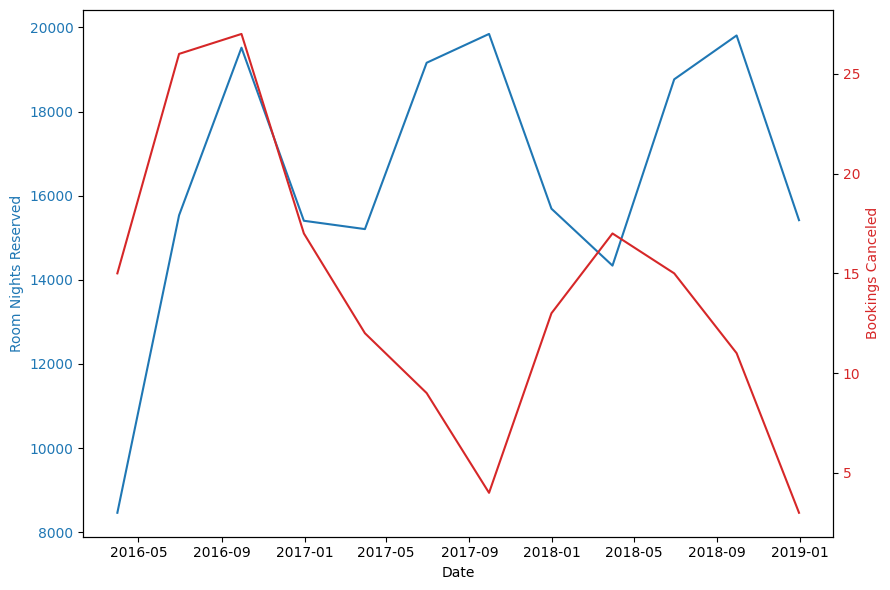

In [67]:
reservations = hotels.groupby('date').agg({'RoomNights': 'sum', 'BookingsCanceled': 'sum'})
reservations_trimestrielles = reservations.resample("QE").sum()

fig, ax1 = plt.subplots(figsize=(9, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Room Nights Reserved', color=color)
ax1.plot(reservations_trimestrielles.index, reservations_trimestrielles['RoomNights'], color=color, label='Room Nights Reserved')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Créer un deuxième axe Y

color = 'tab:red'
ax2.set_ylabel('Bookings Canceled', color=color)
ax2.plot(reservations_trimestrielles.index, reservations_trimestrielles['BookingsCanceled'], color=color, label='Bookings Canceled')
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter une légende avec un titre
fig.tight_layout()
fig.legend(title='Data Type', loc='upper right', loc= "upper left")

# Ajouter des titres
plt.title('Quarterly Sum of Room Nights Reserved and Bookings Canceled')

# Supprimer les bordures droite et haute du premier axe
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Supprimer les bordures gauche et bas du deuxième axe
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Faire une rotation des index sur l'axe des abscisses
plt.xticks(rotation=45)

plt.show()

In [ ]:
quarterly_bookings.head()

# Exercice 4: Bar Chart

Créez un bar chart représentant le total des chambres reservées par nationalité. Gardez seulement le top 10.

Construisez ensuite un bar chart horizontal représentant le montant total des reservations en terme de prix pour le top 10.

In [ ]:
hotels.head()

In [75]:
total_chambres_reservees= hotels.groupby('Nationality')['RoomNights'].sum()
top_10 = total_chambres_reservees.nlargest(10)
hotels.head()


,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


Text(0.5, 0, "Total (en million d'euro)")

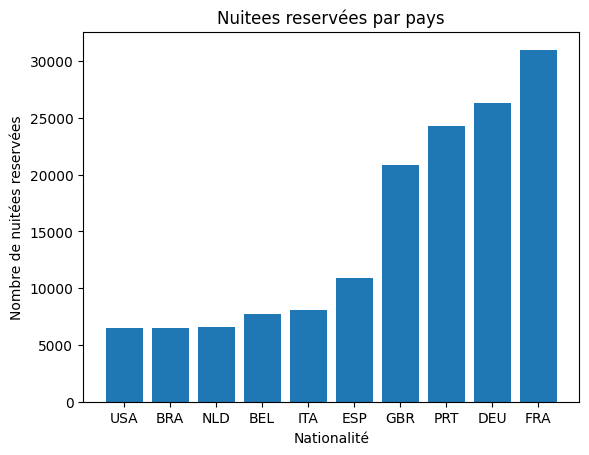

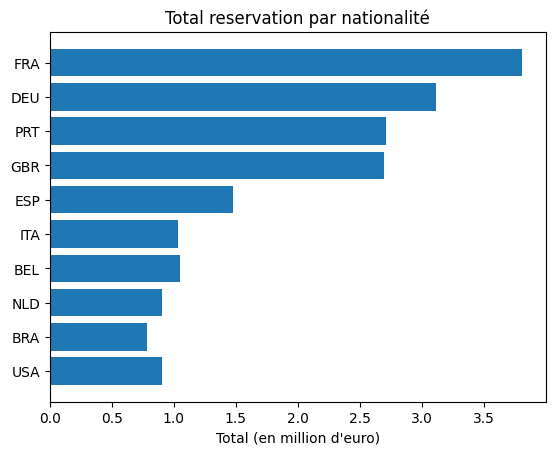

In [77]:
countries = hotels.groupby("Nationality").agg({"RoomNights":"sum","LodgingRevenue":"sum"}).sort_values("RoomNights",ascending=False).iloc[:10]
 
fig, ax = plt.subplots()
 
ax.bar(countries.index[::-1],countries["RoomNights"][::-1])
ax.set_title("Nuitees reservées par pays")
ax.set_ylabel("Nombre de nuitées reservées")
ax.set_xlabel("Nationalité")
 
fig, ax = plt.subplots()
 
ax.barh(
    countries.index[::-1], 
    countries["LodgingRevenue"][::-1] / 1000000
)
 
ax.set_title("Total reservation par nationalité")
ax.set_xlabel("Total (en million d'euro)")

In [ ]:
countries = 

# Exercice 5: Advanced Bar Charts

Créez un bar chart groupé avec le top 5 des nationalités ayant reservées le plus dépensés.
Affichez le total des colonnes `LodgingRevenue`et `OtherRevenue`

Ensuite créez un 100% stacked bar chart avec les colonnes `LodgingRevenue`et `OtherRevenue`. Ajoutez une référence a 80%.

In [ ]:
# countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]
country_subset.head()

In [ ]:
# reponse-prof


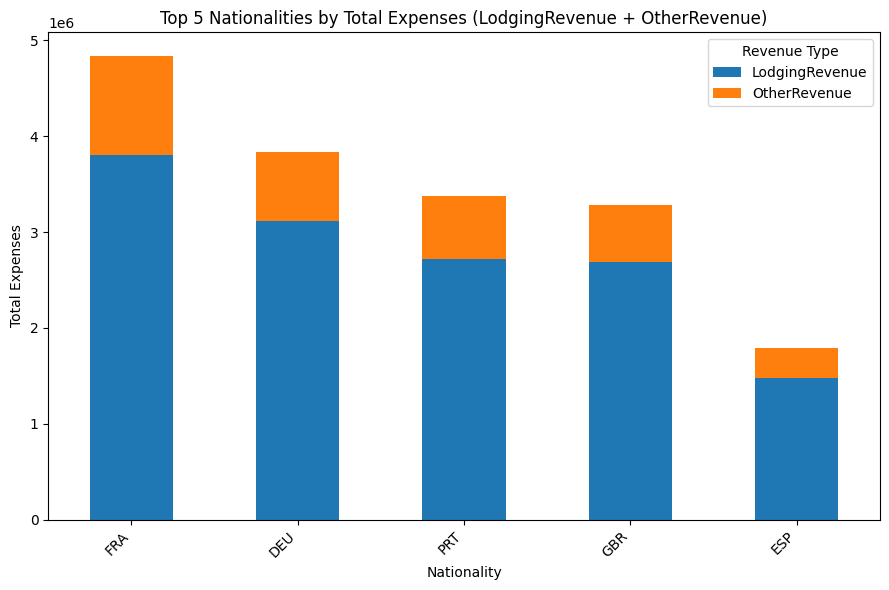

In [81]:
# country_subset= hotels.groupby('nationality').agg({'LodgingRevenue':'sum', 'OtherRevenue':'sum'}).sort_values(ascending=False).head(5)
# country_subset
total_expenses = hotels.groupby('Nationality')[['LodgingRevenue', 'OtherRevenue']].sum()
top_5 = total_expenses.sum(axis=1).sort_values('LodgingRevenue', ascending=False).head(5)
top_5_data = total_expenses.loc[top_5.index]

top_5_data.plot(kind='bar', stacked=True, figsize=(9, 6))
plt.title('Top 5 Nationalities by Total Expenses (LodgingRevenue + OtherRevenue)')
plt.xlabel('Nationality')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Revenue Type')
plt.tight_layout()
plt.show()



# Exercice 6: Pie Charts

Créez un pie chart de `LodgingRevenue` par nationalités. Afficher les top 5 nationalités ainsi qu'une part 'autres' qui regroupe l'ensemble de toutes les autres nationalités. 

Puis créer un donut chart à partir de ce pie chart

In [95]:
country_rev = hotels.groupby('Nationality')['LodgingRevenue'].sum()
countries= country_rev.nlargest(5)
countries


Nationality
FRA    3809315.59
DEU    3113382.55
PRT    2715008.72
GBR    2693123.61
ESP    1475909.33
Name: LodgingRevenue, dtype: float64

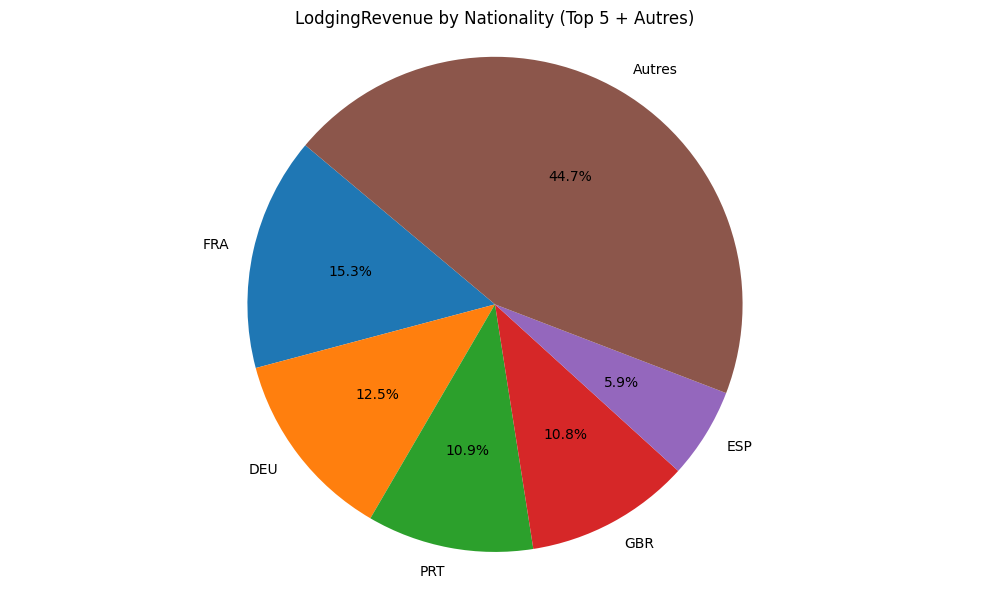

In [93]:
top_5_data = country_rev.loc[countries.index]
top_5_sum = top_5_data.sum()

# Calculer la somme de LodgingRevenue pour toutes les autres nationalités
other_sum = country_rev.sum() - top_5_sum

# Créer une liste des cinq premières nationalités ainsi que 'Autres'
labels = list(countries.index) + ['Autres']

sizes = list(countries.values) + [other_sum]

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Ajouter un titre
plt.title('LodgingRevenue by Nationality (Top 5 + Autres)')

plt.axis('equal')
plt.tight_layout()
plt.show()

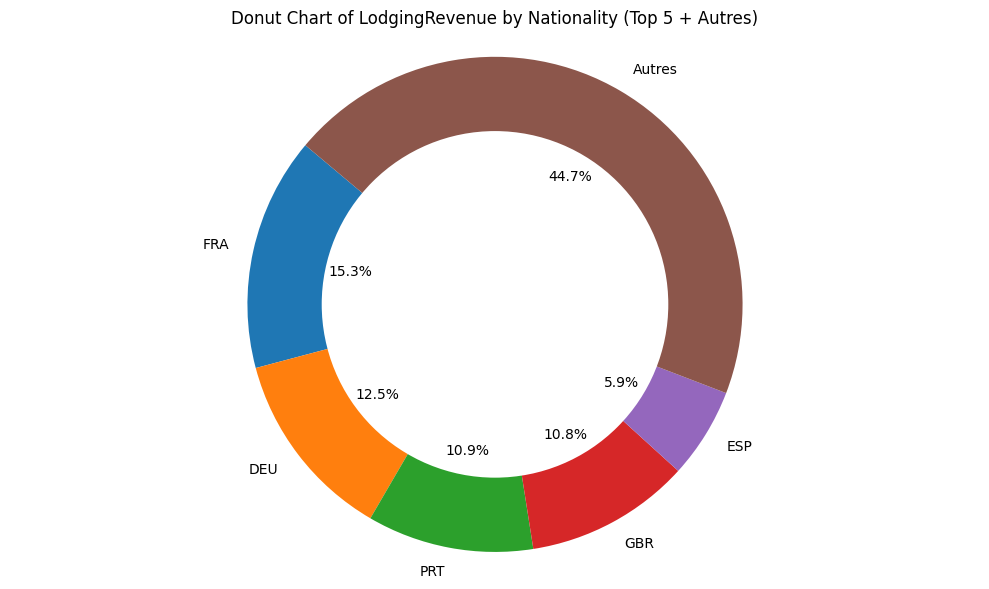

In [94]:
# Créer le pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Ajouter un cercle blanc pour créer le trou central du donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajouter un titre
plt.title('Donut Chart of LodgingRevenue by Nationality (Top 5 + Autres)')

# Afficher le donut chart
plt.axis('equal')
plt.tight_layout()
plt.show()

In [101]:
#deuxieme meth
country_rev_percentage = (hotels

                .groupby("Nationality")

                .agg({"LodgingRevenue": "sum"})

                .sort_values("LodgingRevenue", ascending=False)

                .apply(lambda x: x * 100 / sum(x)))
 
country_rev_percentage
pie_data = (pd.concat([country_rev_percentage.iloc[:5], 

                       pd.DataFrame(

                           {

                               "LodgingRevenue": country_rev_percentage.iloc[5:, 0].sum()

                           }

                           , index=["OTH"])]

                     )

           ).iloc[::-1]
 
pie_data


,LodgingRevenue
OTH,44.721890
ESP,5.909105
GBR,10.782472
PRT,10.870093
DEU,12.465065
FRA,15.251375


Text(0.5, 1.0, 'Pourcentage des revenus par nationalité')

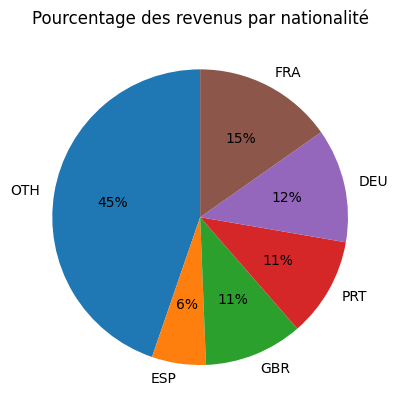

In [103]:
fig, ax = plt.subplots()
 
ax.pie(pie_data["LodgingRevenue"], 

       startangle=90,

       labels = pie_data.index,

       autopct='%.0f%%')
 
ax.set_title("Pourcentage des revenus par nationalité")


# Exercice 7: Scatterplots & Histograms

Construisez un nuage de points qui compare la moyenne des nuitées par pays au revenu moyen par client par pays.
Ensuite, construisez un diagramme à bulles en spécifiant la taille des bulles comme étant le revenu moyen par nuitée.

Enfin, construisez un histogramme comparant l'âge des clients en Allemagne à l'âge des clients en France.

Si vous bloquez sur le calcul des colonnes:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>

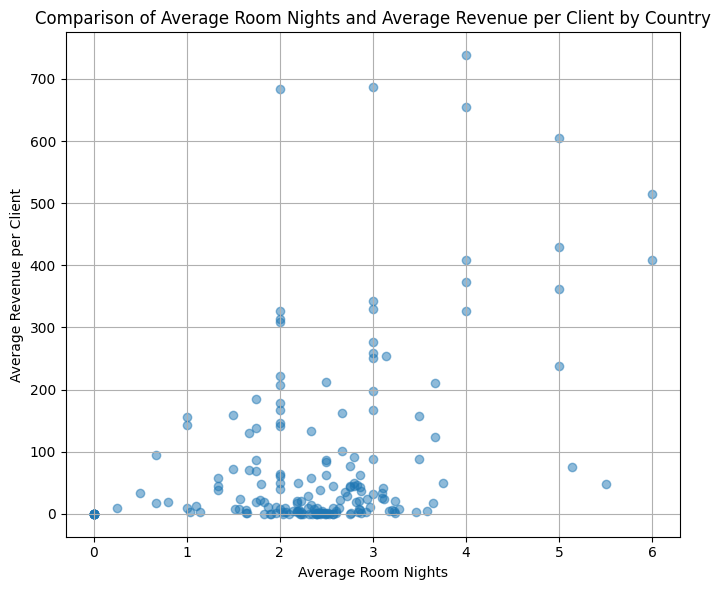

In [104]:
country_stats= hotels.groupby('Nationality').agg({'RoomNights': 'mean', 'LodgingRevenue': lambda x: x.mean() / len(x)})

# Renommer la colonne pour refléter le revenu moyen par client
country_stats.rename(columns={'LodgingRevenue': 'AverageRevenuePerClient'}, inplace=True)

# Créer le nuage de points
plt.figure(figsize=(7, 6))
plt.scatter(country_stats['RoomNights'], country_stats['AverageRevenuePerClient'], alpha=0.5)

# Ajouter des titres et des étiquettes
plt.title('Comparison of Average Room Nights and Average Revenue per Client by Country')
plt.xlabel('Average Room Nights')
plt.ylabel('Average Revenue per Client')
plt.grid(True)
plt.tight_layout()

# Exercice 8: Subplots

Afficher dans un plot différent les dépenses des 5 top nationalités par revenus (FRA,ESP,DEU,GBR,PRT)

Gardez seulement les données ou le nombre de nuitées est < 10 !

Pensez à partager les axes de vos subplots !

Vous pouvez supprimer le dernier subplots avec `ax[row, col].set_axis_off()`


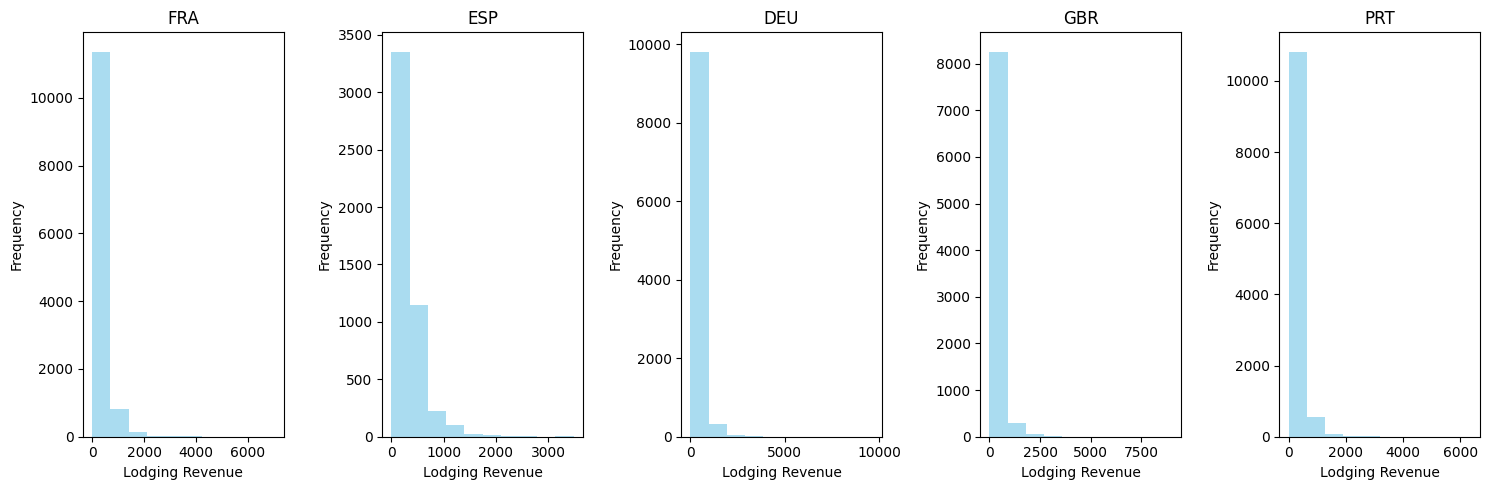

In [108]:
top_nationalities = ['FRA', 'ESP', 'DEU', 'GBR', 'PRT']

# Filtrer les données pour ne conserver que les lignes avec les cinq principales nationalités et où le nombre de nuitées est inférieur à 10
filtered_data = hotels[(hotels['Nationality'].isin(top_nationalities)) & (hotels['RoomNights'] < 10)]

# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=len(top_nationalities), figsize=(15, 5))

# Itérer sur les sous-graphiques et créer un graphique pour chaque nationalité
for i, nationality in enumerate(top_nationalities):
    # Sélectionner les données pour la nationalité actuelle
    data = filtered_data[filtered_data['Nationality'] == nationality]
    
    # Tracer un histogramme de revenus pour la nationalité actuelle
    axes[i].hist(data['LodgingRevenue'], bins=10, color='skyblue', alpha=0.7)
    
    # Ajouter un titre pour chaque sous-plot
    axes[i].set_title(nationality)
    
    # Ajouter des étiquettes d'axe
    axes[i].set_xlabel('Lodging Revenue')
    axes[i].set_ylabel('Frequency')

# Ajuster automatiquement les sous-graphiques pour éviter les chevauchements
plt.tight_layout()
plt.show()

# Exercice 9: GridSpec

Créez une gridspec avec 

* un line chart montrant les dépenses en nuitées et les autres dépenses
* un bar chart des dépenses totales (Lodging + Other Revenue) par pays pour le top 5
* un donut chart avec un texte '81%' en son centre et 'Pourcentage de revenus atteint en 2018'

KeyError: 'total_revenue'

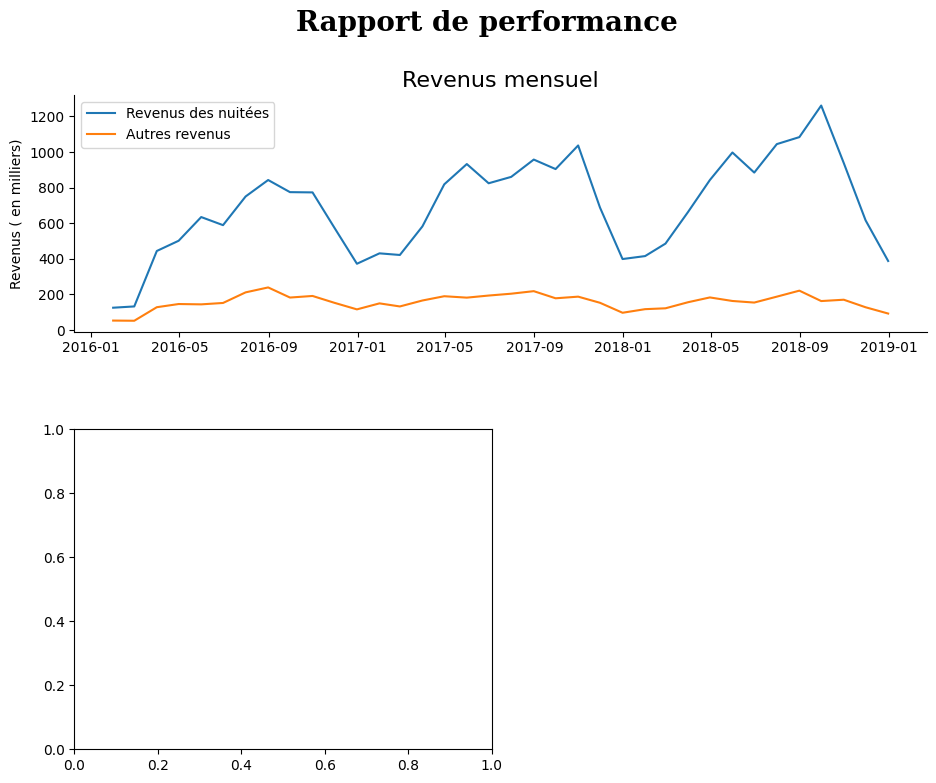

In [130]:
import matplotlib.gridspec as gridspec
 
fig = plt.figure(figsize=(11, 8.5))
 
gs = gridspec.GridSpec(nrows=8, ncols=8)
 
fig.suptitle( "Rapport de performance", fontsize=20, fontweight="bold", fontfamily="serif")
 
ax1 = fig.add_subplot(gs[0:3, :])

ax1.plot(
    monthly_revenue.index, 
    monthly_revenue["LodgingRevenue"] / 1000,
    label="Revenus des nuitées",
)
 
ax1.plot(
    monthly_revenue.index, 
    monthly_revenue["OtherRevenue"] / 1000, 
    label="Autres revenus"
)
 
ax1.set_title("Revenus mensuel", fontsize=16)
ax1.set_ylabel("Revenus ( en milliers)")
 
ax1.legend(loc="upper left")
 
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
 
# Bar Chart
ax2 = fig.add_subplot(gs[4:, :4])
 
ax2.bar(
    x=country_rev .index, 
    height=country_rev ["total_revenue"] / 1000000,
)
 
ax2.set_title("Dépenses par nationalités")
ax2.set_xticks(range(len(country_rev .index)))
ax2.set_xticklabels(country_rev .index)
ax2.set_ylabel("Dépenses ( en millions d'euros)")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
 
# Pie Chart
 
ax3 = fig.add_subplot(gs[4:, 4:])
 
pie_list = [0.19, 0.81]
 
ax3.pie(
    pie_list,
    startangle=90,
    labels=["", ""],
    # autopct='%.0f%%',
    #pctdistance=0.85,
    colors=["white", "#BACD92"]
)
 
hole = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(hole)
plt.text(
    0, 0, 
    f"{pie_list[1] * 100}%", 
    ha="center", 
    va="center", 
    fontsize=28
)
 
ax3.set_title("Pourcentage de revenus atteint en 2018 sur l'objectif", fontsize=12)
 
plt.savefig('rapport_de_perf')

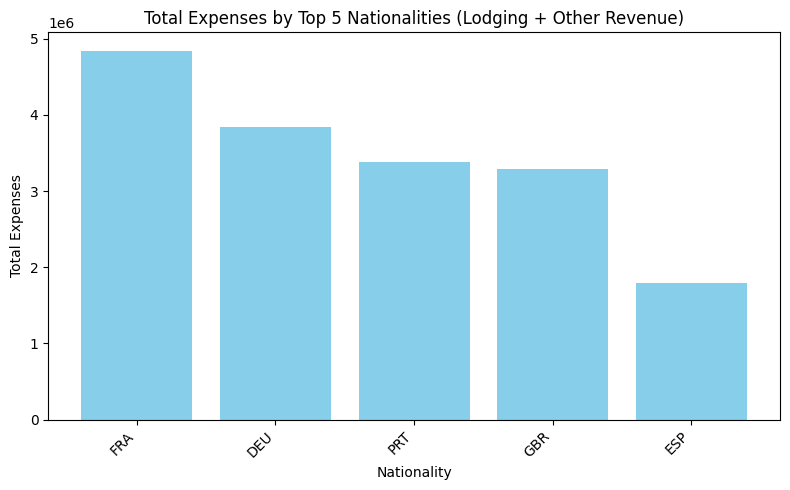

In [126]:
total_expenses = hotels.groupby('Nationality')[['LodgingRevenue', 'OtherRevenue']].sum()
total_expenses['TotalExpenses'] = total_expenses['LodgingRevenue'] + total_expenses['OtherRevenue']
top_5_countries = total_expenses.nlargest(5, 'TotalExpenses').index

# Filtrer les données pour ne conserver que les lignes avec les cinq premières nationalités
filtered_data_top_5 = total_expenses.loc[top_5_countries]

# Créer le bar chart
plt.figure(figsize=(8, ))
plt.bar(filtered_data_top_5.index, filtered_data_top_5['TotalExpenses'], color='skyblue')

# Ajouter des titres et des étiquettes
plt.title('Total Expenses by Top 5 Nationalities (Lodging + Other Revenue)')
plt.xlabel('Nationality')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Exercice 10: Bar and Hist

Construisez un histogram des revenus des nuitées avec seaborn. Filtrer les données ou les revenus sont < 1000.
Construisez également un barchart horizontal montrant la moyenne de nuitées pour les 5 top nationalités

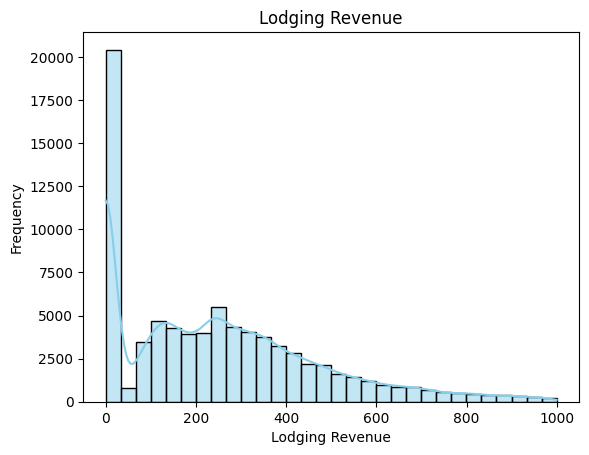

In [138]:
filtered_data = hotels[hotels['LodgingRevenue'] < 1000]

# plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='LodgingRevenue', bins=30, kde=True, color='skyblue')
plt.title('Lodging Revenue')
plt.xlabel('Lodging Revenue')
plt.ylabel('Frequency')
plt.show()


In [ ]:

data=
hue=

In [ ]:
sns.bafiltre=hotels[

# Exercice 11: Box et violin plot

Construisez un seul diagramme en boîte de LodgingRevenue pour nos 5 premiers pays, où le revenu par nuitée est inférieur à 1000.

Ensuite, construisez un graphique avec un diagramme en violon pour chaque pays où le revenu par nuitée est inférieur à 1000

Enfin, construisez un diagramme en violon pour la distribution des âges pour chacun de nos 5 premiers pays.


In [145]:
# top_5_countries = ['FRA', 'ESP', 'DEU', 'GBR', 'PRT']

# sns.boxplot(y= 'LodgingRevenue', data=top_5_countries.query['LodgingRevenue<1000'],
#             hue= 'Nationality',
#             palette='rainbow',
#             linewidth=0.5)
# plt.show()
plt.figure(figsize=(12, 8))
box = sns.boxplot(
    x=top_nationalities_data['Nationality'],
    y=top_nationalities_data['LodgingRevenue'], 
    hue=top_nationalities_data['Nationality'],
    palette='rainbow',
    linewidth=0.5)
 
box.legend(loc='upper left', bbox_to_anchor=(1, 0.5), title='Nationality')
            


NameError: name 'top_nationalities_data' is not defined

<Figure size 1200x800 with 0 Axes>

In [144]:
sns.violinplot(

    x="Nationality",

    y="LodgingRevenue",

    data=top5_countries.query("LodgingRevenue < 1000")

)
sns.violinplot(

    x="Nationality",

    y="Age",

    data=top5_countries

)

NameError: name 'top5_countries' is not defined